**классификатор изображений LeNet**

Евгений Борисов borisov.e@solarl.ru

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Convolution2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout

# from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import utils

In [3]:
np.random.seed(1671)

## Данные

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train = train_images[:,:,:,np.newaxis].astype('float32')/255.
X_test = test_images[:,:,:,np.newaxis].astype('float32')/255.

In [7]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [8]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(train_labels, NB_CLASSES)
y_test = utils.to_categorical(test_labels, NB_CLASSES)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [10]:
IMG_ROWS, IMG_COLS = X_train.shape[1:3] # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)

## Модель

In [11]:
# initialize the optimizer and model
# model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

model = Sequential()

model.add(Input( shape=INPUT_SHAPE, name='input1' ) )

# CONV => RELU => POOL
model.add(Convolution2D(20,
                        kernel_size=5,
                        padding='same',
#                         input_shape=INPUT_SHAPE,
                        activation='relu',
                        name='conv1'
                       ))

model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2),
                       name='maxPool1'
                      ))

# model.add(Dropout(rate=0.7))

# CONV => RELU => POOL
model.add(Convolution2D(50, kernel_size=5, padding='same',activation='relu',name='conv2'))
# model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2),
                       name='maxPool2'
                      ))

# model.add(Dropout(rate=0.7))
# Flatten => RELU layers
model.add(Flatten(name='flatten1'))
model.add(Dense(500,activation='relu',name='hidden1',))

# model.add(Activation("relu"))
# model.add(Dropout(rate=0.7))
# a softmax classifier
model.add(Dense(NB_CLASSES, activation='softmax',name='out_softmax',))
# model.add(Activation("softmax"))

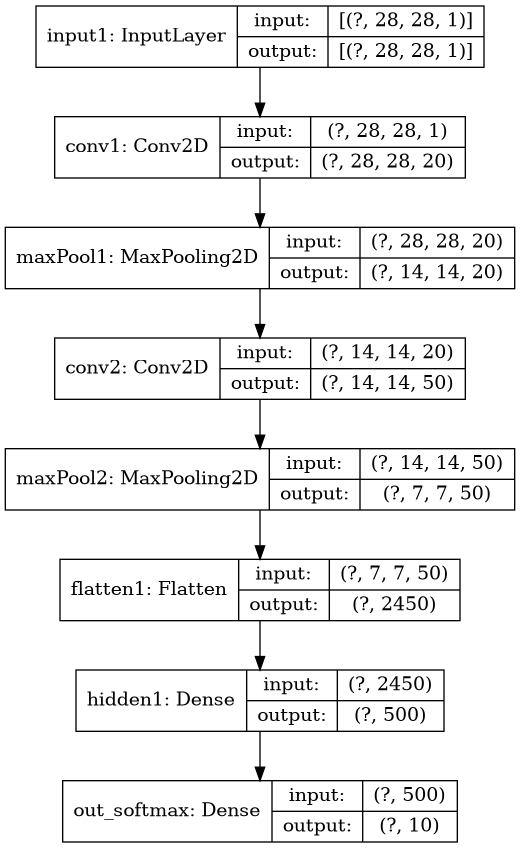

In [12]:
import IPython
from tensorflow.keras.utils import plot_model

# plot_model(model,to_file='result/model.png', show_layer_names=False, show_shapes=True )
plot_model(model,to_file='model.png', show_layer_names=True, show_shapes=True )
IPython.display.Image('model.png')

In [13]:
# model.summary()

In [14]:
# model.compile(loss="categorical_crossentropy", optimizer='rmsprop',metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])

## Обучение

In [15]:
# network and training
NB_EPOCH = 50
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
%%time

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 81us/sample - loss: 1.2122 - accuracy: 0.5945 - val_loss: 0.7493 - val_accuracy: 0.7198
Epoch 2/50
48000/48000 [==============================] - 3s 55us/sample - loss: 0.6961 - accuracy: 0.7483 - val_loss: 0.6153 - val_accuracy: 0.7835
Epoch 3/50
48000/48000 [==============================] - 3s 55us/sample - loss: 0.5940 - accuracy: 0.7857 - val_loss: 0.5489 - val_accuracy: 0.8033
Epoch 4/50
48000/48000 [==============================] - 3s 56us/sample - loss: 0.5433 - accuracy: 0.8033 - val_loss: 0.5266 - val_accuracy: 0.8071
Epoch 5/50
48000/48000 [==============================] - 3s 55us/sample - loss: 0.5023 - accuracy: 0.8199 - val_loss: 0.4858 - val_accuracy: 0.8272
Epoch 6/50
48000/48000 [==============================] - 3s 56us/sample - loss: 0.4695 - accuracy: 0.8321 - val_loss: 0.5401 - val_accuracy: 0.8061
Epoch 7/50
48000/48000 [==============================] 

48000/48000 [==============================] - 3s 55us/sample - loss: 0.2150 - accuracy: 0.9219 - val_loss: 0.2752 - val_accuracy: 0.9002
CPU times: user 2min 21s, sys: 6.2 s, total: 2min 27s
Wall time: 2min 15s


## Тестирование

In [18]:
score = model.evaluate(X_test, y_test, verbose=False)
print('Test accuracy:', score[1])

Test accuracy: 0.8984


---

In [19]:
# import matplotlib.pyplot as plt

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

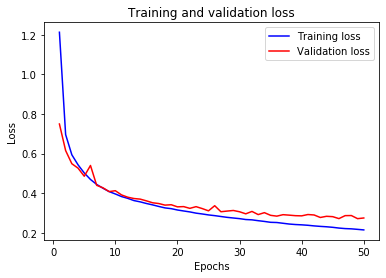

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

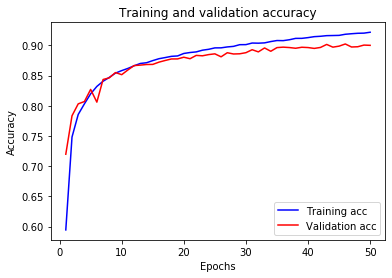

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [24]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

---

In [23]:
p = model.predict(X_test)
r = np.argmax(p,axis=1)
n = test_images.shape[1]

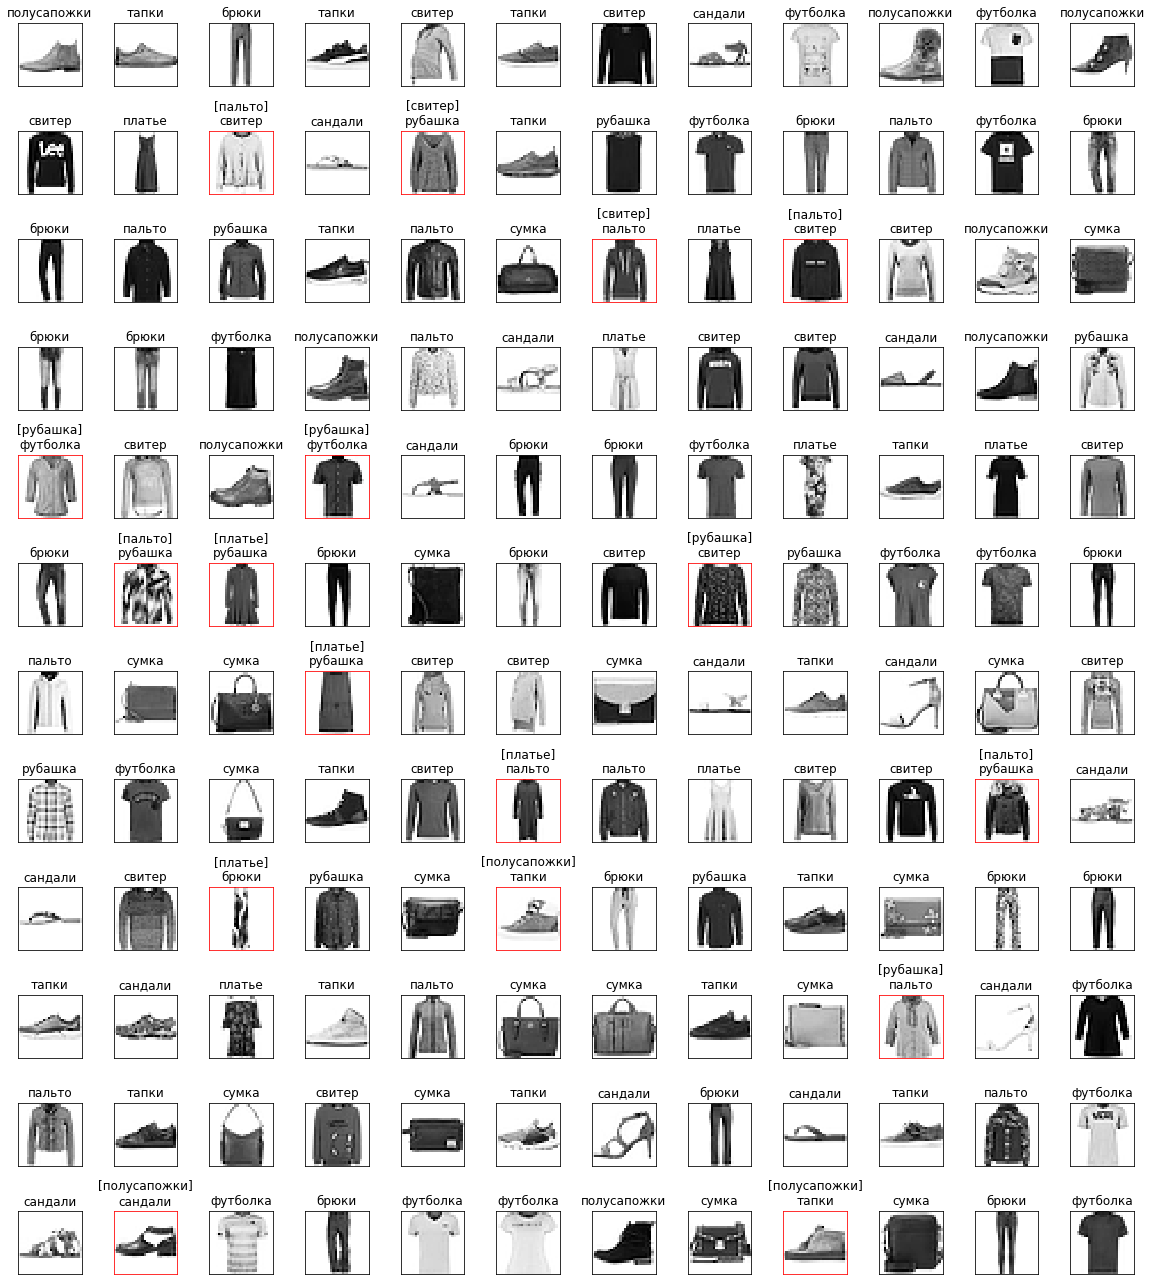

In [26]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        
        axarr[i][j].imshow(
            test_images[k,:,:],
            cmap= plt.cm.Greys # if (r[k]==test_labels[k]) else plt.cm.terrain
        )
        axarr[i][j].set_title(
            class_names[r[k]] if (r[k]==test_labels[k]) else '['+class_names[test_labels[k]]+']\n'+class_names[r[k]]
        )
        
        if (r[k]!=test_labels[k]): 
            for spine in axarr[i][j].spines.values(): 
                spine.set_edgecolor('red')
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 2.0.0
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1']]
default GPU device: /device:GPU:0
